<a href="https://colab.research.google.com/github/savitra-roy/Porfolio/blob/main/waam_Final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import os

In [15]:
center_x,center_y,major,minor,orientation= [],[],[],[],[]
my_dict={}
def img_preprocessing(imaage):
  gray = cv.cvtColor(imaage, cv.COLOR_BGR2GRAY)


  blurred= cv.GaussianBlur(gray, (5,5), 0)


  _,threshold = cv.threshold(blurred, 200, 255, cv.THRESH_BINARY)


  cany =cv.Canny(threshold, 100, 200)


  contours,_= cv.findContours(cany,cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
  ellipse= None

  largest_contour = max(contours, key=cv.contourArea)



  ellipse = cv.fitEllipse(largest_contour)

  result_image= imaage.copy()





  cv.ellipse(result_image, ellipse, (0,255,0), 2)
  start_point = (int(ellipse[0][0]), int(ellipse[0][1]))  # Convert to int
  end_point = (
    int(ellipse[0][0] + (ellipse[1][1] / 2) * np.cos(np.radians(ellipse[2]))),
    int(ellipse[0][1] + (ellipse[1][1] / 2) * np.sin(np.radians(ellipse[2])))
)
  cv.arrowedLine(result_image,start_point,end_point,(0,0,255),2)
  center_x.append(round(ellipse[0][0],3))
  center_y.append(round(ellipse[0][1],3))
  minor.append(round(ellipse[1][0],3))
  major.append(round(ellipse[1][1],3))
  orientation.append(round(ellipse[2],3))





  return result_image

exp1


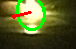

exp2


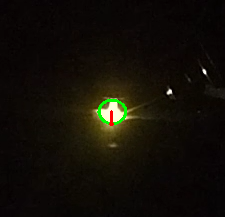

exp3


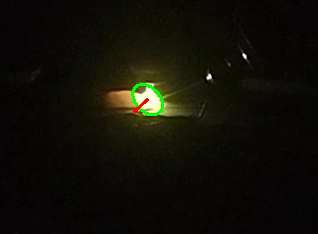

exp4


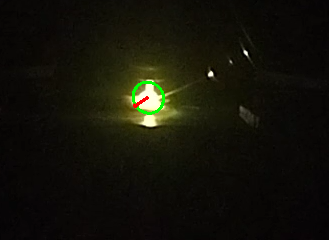

exp5


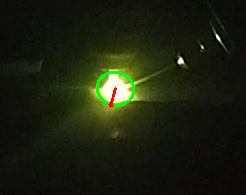

Image exp6.png not found.
exp7


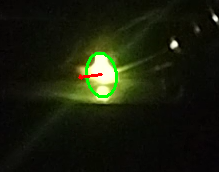

exp8


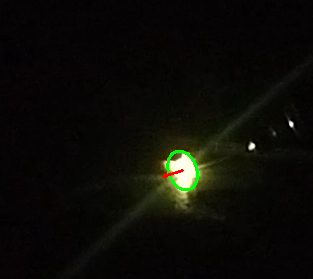

exp9


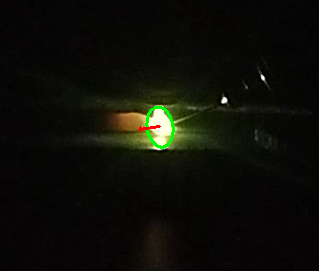

exp10


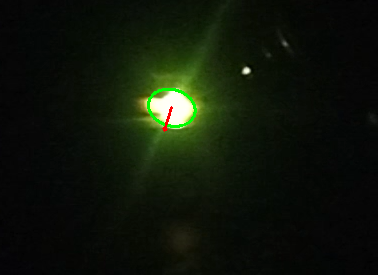

exp11


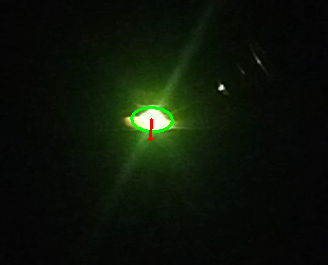

exp12


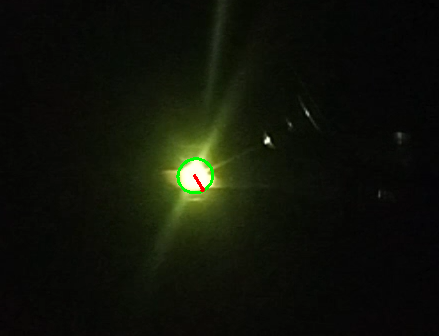

exp13


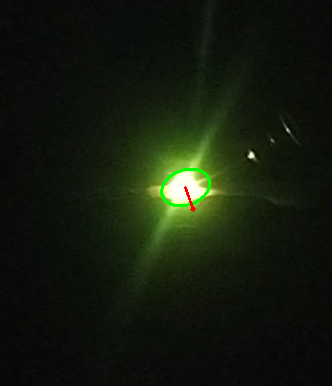

exp14


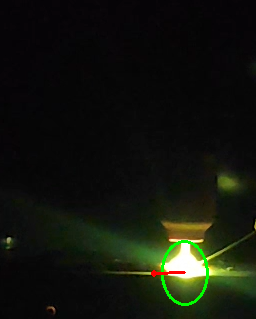

exp15


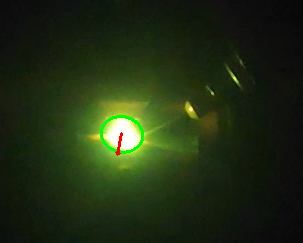

exp16


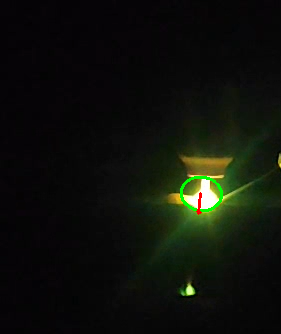

exp17


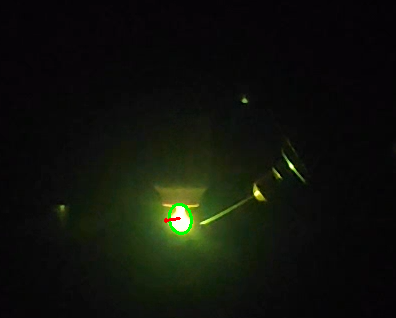

Image exp18.png not found.
exp19


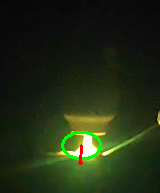

exp20


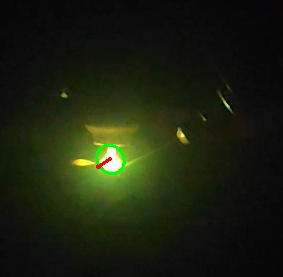

exp21


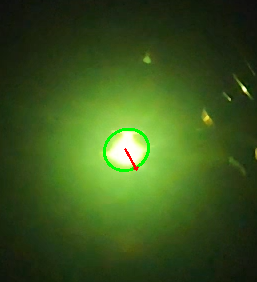

exp22


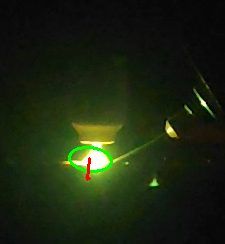

exp23


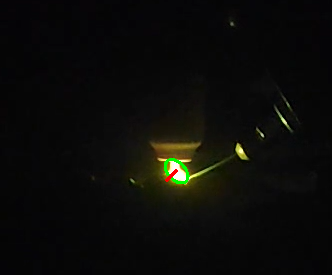

exp24


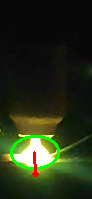

exp25


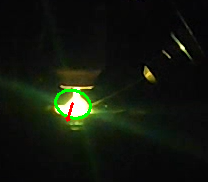

exp26


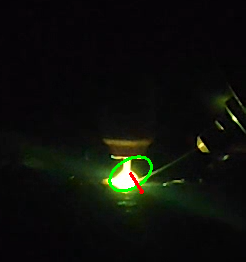

exp27


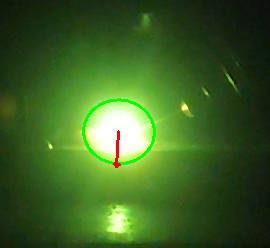

In [16]:


for i in range(1, 28):
    img_path = f'exp{i}.png'


    img = cv.imread(img_path)


    if img is None:
        print(f"Image {img_path} not found.")
        continue

    result_image =img_preprocessing(img)
    print(f'exp{i}')
    cv2_imshow(result_image)




In [ ]:
my_dict= {
    'center_x':center_x,
    'center_y':center_y,
    'orientation':orientation,
    'major-axis':major,
    'minor-axis':minor
}


In [ ]:
import pandas as pd
df=pd.DataFrame(my_dict)
df

,center_x,center_y,orientation,major-axis,minor-axis
0,30.212,12.346,165.345,33.924,26.579
1,111.877,111.363,89.735,26.894,23.475
2,147.312,99.146,136.271,34.966,24.136
3,147.858,97.145,144.383,31.913,29.644
4,115.027,88.287,105.721,37.062,32.483
5,101.034,74.552,172.362,43.923,29.773
6,182.079,170.075,160.123,39.938,28.090
7,159.552,126.600,171.093,40.408,25.719
8,171.320,107.281,105.636,47.495,36.197
9,151.509,119.190,93.277,40.423,23.967
